# RAPIDS cuML 
## Performance, Boundaries, and Correctness Benchmarks

**Description:** This notebook provides a simple and unified means of benchmarking single GPU cuML algorithms against their skLearn counterparts with the `cuml.benchmark` package in RAPIDS cuML. This enables quick and simple measurements of performance, validation of correctness, and investigation of upper bounds.

Each benchmark returns a Pandas `DataFrame` with the results. At the end of the notebook, these results are used to draw charts and output to a CSV file. 

Please refer to the [table of contents](#table_of_contents) for algorithms available to be benchmarked with this notebook.

In [1]:
import datetime
print(datetime.datetime.now())
import cuml
import pandas as pd

from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name

import warnings
warnings.filterwarnings('ignore', 'Expected column ')

print(cuml.__version__)

2020-05-23 19:31:19.770873


/usr/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


0.15.0a+64.g60dae446c.dirty


In [2]:
print(datetime.datetime.now())
N_REPS = 3  # Number of times each test is repeated

DATA_NEIGHBORHOODS = "blobs"
DATA_CLASSIFICATION = "classification"
DATA_REGRESSION = "regression"

INPUT_TYPE = "numpy"

benchmark_results = []

2020-05-23 19:31:22.565662


In [3]:
print(datetime.datetime.now())
SSMALL_ROW_SIZES = [2**x for x in range(8, 10)]
SMALL_ROW_SIZES = [2**x for x in range(14, 17)]
LARGE_ROW_SIZES = [2**x for x in range(18, 24, 2)]

SSKINNY_FEATURES = [8, 32]
SKINNY_FEATURES = [32, 256]
WIDE_FEATURES = [1000, 10000]

VERBOSE=True
RUN_CPU=True

2020-05-23 19:31:22.572491


In [4]:
print(datetime.datetime.now())
def enrich_result(algorithm, runner, result):
    result["algo"] = algorithm
    result["dataset_name"] = runner.dataset_name
    result["input_type"] = runner.input_type
    return result

def execute_benchmark(algorithm, runner, verbose=VERBOSE, run_cpu=RUN_CPU, **kwargs):
    results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
    results = [enrich_result(algorithm, runner, result) for result in results]
    benchmark_results.extend(results)

2020-05-23 19:31:22.577600


## Table of Contents<a id="table_of_contents"/>

### Benchmarks
1. [Neighbors](#neighbors)<br>
    1.1 [Nearest Neighbors - Brute Force](#nn_bruteforce)<br>
    1.2 [KNeighborsClassifier](#kneighborsclassifier)<br>
    1.3 [KNeighborsRegressor](#kneighborsregressor)<br>
2. [Clustering](#clustering)<br>
    2.1 [DBSCAN - Brute Force](#dbscan_bruteforce)<br>
    2.2 [K-Means](#kmeans)<br>
3. [Manifold Learning](#manifold_learning)<br>
    3.1 [UMAP - Unsupervised](#umap_unsupervised)<br>
    3.2 [UMAP - Supervised](#umap_supervised)<br>
    3.3 [T-SNE](#tsne)<br>
4. [Linear Models](#linear_models)<br>
    4.1 [Linear Regression](#linear_regression)<br>
    4.2 [Logistic Regression](#logistic_regression)<br>
    4.3 [Ridge Regression](#ridge_regression)<br>
    4.4 [Lasso Regression](#lasso_regression)<br>
    4.5 [ElasticNet Regression](#elasticnet_regression)<br>
    4.6 [Mini-batch SGD Classifier](#minibatch_sgd_classifier)<br>
5. [Decomposition](#decomposition)<br>
    5.1 [PCA](#pca)<br>
    5.2 [Truncated SVD](#truncated_svd)<br>
6. [Ensemble](#ensemble)<br>
    6.1 [Random Forest Classifier](#random_forest_classifier)<br>
    6.2 [Random Forest Regressor](#random_forest_regressor)<br>
    6.3 [FIL](#fil)<br>
    6.4 [Sparse FIL](#sparse_fil)<br>
7. [Random Projection](#random_projection)<br>
    7.1 [Gaussian Random Projection](#gaussian_random_projection)<br>
    7.2 [Sparse Random Projection](#sparse_random_projection)<br>
8. [SVM](#svm)<br>
    8.1 [SVC - Linear Kernel](#svc_linear_kernel)<br>
    8.2 [SVC - RBF Kernel](#svc_rbf_kernel)<br>
    8.3 [SVR - Linear Kernel](#svr_linear_kernel)<br>
    8.4 [SVR - RBF Kernel](#svr_rbf_kernel)<br>
    
### Chart & Store Results
9. [Convert to Pandas DataFrame](#convert_to_pandas)<br>
10. [Chart Results](#chart_results)<br>
11. [Output to CSV](#output_csv)<br>

## Neighbors<a id="neighbors"/>


### Nearest Neighbors - Brute Force<a id="nn_bruteforce"/>

In [5]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS,
)

execute_benchmark("NearestNeighbors", runner)

2020-05-23 19:31:22.580954
NearestNeighbors (n_samples=16384, n_features=32) [cpu=6.285706996917725, gpu=0.19940638542175293, speedup=31.522094859816995]
NearestNeighbors (n_samples=16384, n_features=256) [cpu=14.877736806869507, gpu=0.19953083992004395, speedup=74.56359534611951]
NearestNeighbors (n_samples=32768, n_features=32) [cpu=20.85593605041504, gpu=0.359907865524292, speedup=57.94798627152361]
NearestNeighbors (n_samples=32768, n_features=256) [cpu=56.49604272842407, gpu=0.3797273635864258, speedup=148.7805413727199]
NearestNeighbors (n_samples=65536, n_features=32) [cpu=79.71378064155579, gpu=0.778296709060669, speedup=102.42081164362475]
NearestNeighbors (n_samples=65536, n_features=256) [cpu=222.2226960659027, gpu=0.8509078025817871, speedup=261.1595467706893]


### KNeighborsClassifier<a id="kneighborsclassifier"/>

In [6]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsClassifier", runner)

2020-05-23 19:51:36.590233
KNeighborsClassifier (n_samples=16384, n_features=32) [cpu=0.03601717948913574, gpu=0.0008358955383300781, speedup=43.08813462635482]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=16384, n_features=256) [cpu=0.3838315010070801, gpu=0.002978086471557617, speedup=128.8852773997278]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=32768, n_features=32) [cpu=0.08307886123657227, gpu=0.001033782958984375, speedup=80.36392988929889]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=32768, n_features=256) [cpu=0.9069554805755615, gpu=0.0052793025970458984, speedup=171.79456261572506]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=65536, n_features=32) [cpu=0.21511554718017578, gpu=0.0016703605651855469, speedup=128.7838995147017]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=65536, n_features=256) [cpu=2.1805081367492676, gpu=0.009855508804321289, speedup=221.24764738611898]


### KNeighborsRegressor<a id="kneighborsregressor"/>

In [7]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsRegressor", runner)

2020-05-23 19:51:49.356200
KNeighborsRegressor (n_samples=16384, n_features=32) [cpu=0.03596639633178711, gpu=0.0009944438934326172, speedup=36.16734596020139]
KNeighborsRegressor (n_samples=16384, n_features=256) [cpu=0.3861250877380371, gpu=0.0030002593994140625, speedup=128.69723458359823]
KNeighborsRegressor (n_samples=32768, n_features=32) [cpu=0.07898068428039551, gpu=0.0010256767272949219, speedup=77.00348675034867]
KNeighborsRegressor (n_samples=32768, n_features=256) [cpu=0.9154548645019531, gpu=0.0053558349609375, speedup=170.92663817663816]
KNeighborsRegressor (n_samples=65536, n_features=32) [cpu=0.1996760368347168, gpu=0.001680135726928711, speedup=118.84518234709806]
KNeighborsRegressor (n_samples=65536, n_features=256) [cpu=2.1733908653259277, gpu=0.009763240814208984, speedup=222.60957264957264]


## Clustering<a id="clustering"/>

### DBSCAN - Brute Force<a id="dbscan_bruteforce"/>

In [8]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("DBSCAN", runner)

2020-05-23 19:52:01.898347
DBSCAN (n_samples=16384, n_features=32) [cpu=5.09555196762085, gpu=0.02541375160217285, speedup=200.5037291379359]
DBSCAN (n_samples=16384, n_features=256) [cpu=51.24647235870361, gpu=0.06460189819335938, speedup=793.2657366400945]
DBSCAN (n_samples=32768, n_features=32) [cpu=20.29845118522644, gpu=0.07465958595275879, speedup=271.88003959826915]
DBSCAN (n_samples=32768, n_features=256) [cpu=204.77542114257812, gpu=0.1959526538848877, speedup=1045.0249949810498]
DBSCAN (n_samples=65536, n_features=32) [cpu=81.51097297668457, gpu=0.23173141479492188, speedup=351.74761716627984]
DBSCAN (n_samples=65536, n_features=256) [cpu=824.0949006080627, gpu=0.7309553623199463, speedup=1127.4216499247027]


### K-means Clustering<a id="kmeans"/>

In [9]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type="numpy",
    n_reps=N_REPS
)

execute_benchmark("KMeans", runner)

2020-05-23 20:51:32.429353
KMeans (n_samples=16384, n_features=32) [cpu=0.03386950492858887, gpu=0.03787803649902344, speedup=0.8941726673044967]
KMeans (n_samples=16384, n_features=256) [cpu=0.19319558143615723, gpu=0.050499916076660156, speedup=3.825661435612713]
KMeans (n_samples=32768, n_features=32) [cpu=0.0663309097290039, gpu=0.0733644962310791, speedup=0.9041281973787263]
KMeans (n_samples=32768, n_features=256) [cpu=0.3870513439178467, gpu=0.08834290504455566, speedup=4.381238580762515]
KMeans (n_samples=65536, n_features=32) [cpu=0.12109971046447754, gpu=0.13118433952331543, speedup=0.923126273338095]
KMeans (n_samples=65536, n_features=256) [cpu=0.7768268585205078, gpu=0.14858341217041016, speedup=5.228220614758571]


## Manifold Learning<a id="manifold_learning"/>

### UMAP - Unsupervised<a id="umap_unsupervised"/>
CPU benchmark requires UMAP-learn

In [10]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Unsupervised", runner)

2020-05-23 20:51:39.386123
UMAP-Unsupervised (n_samples=16384, n_features=1000) [cpu=8.587692022323608, gpu=0.19084954261779785, speedup=44.99718419300395]
UMAP-Unsupervised (n_samples=16384, n_features=10000) [cpu=15.158691644668579, gpu=0.5989675521850586, speedup=25.30803478313481]
UMAP-Unsupervised (n_samples=32768, n_features=1000) [cpu=17.021605014801025, gpu=0.3475303649902344, speedup=48.97875618805089]
UMAP-Unsupervised (n_samples=32768, n_features=10000) [cpu=31.000423669815063, gpu=1.811828374862671, speedup=17.110022174238644]
UMAP-Unsupervised (n_samples=65536, n_features=1000) [cpu=35.527058601379395, gpu=0.858154296875, speedup=41.39938322368421]
UMAP-Unsupervised (n_samples=65536, n_features=10000) [cpu=70.31882357597351, gpu=5.386752128601074, speedup=13.054029941829741]


### UMAP - Supervised<a id="umap_supervised"/>
CPU benchmark requires UMAP-learn

In [11]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Supervised", runner)

2020-05-23 21:02:02.168544
UMAP-Supervised (n_samples=16384, n_features=1000) [cpu=8.645503759384155, gpu=0.18961811065673828, speedup=45.59429333749101]
UMAP-Supervised (n_samples=16384, n_features=10000) [cpu=14.525732040405273, gpu=0.5971286296844482, speedup=24.325968172186577]
UMAP-Supervised (n_samples=32768, n_features=1000) [cpu=17.056203365325928, gpu=0.35109400749206543, speedup=48.58016087247342]
UMAP-Supervised (n_samples=32768, n_features=10000) [cpu=31.933588981628418, gpu=1.8181531429290771, speedup=17.56375094464421]
UMAP-Supervised (n_samples=65536, n_features=1000) [cpu=36.054064989089966, gpu=0.8606200218200684, speedup=41.89312829701731]
UMAP-Supervised (n_samples=65536, n_features=10000) [cpu=68.21537184715271, gpu=5.412966728210449, speedup=12.602215249474666]


### T-SNE<a id="tsne"/>

In [12]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SSMALL_ROW_SIZES, 
    bench_dims=SSKINNY_FEATURES, 
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("TSNE", runner, run_cpu=False)

2020-05-23 21:11:45.104262
TSNE (n_samples=256, n_features=8) [cpu=0.0, gpu=0.3093838691711426, speedup=0.0]
TSNE (n_samples=256, n_features=32) [cpu=0.0, gpu=0.3081328868865967, speedup=0.0]
TSNE (n_samples=512, n_features=8) [cpu=0.0, gpu=0.34998035430908203, speedup=0.0]
TSNE (n_samples=512, n_features=32) [cpu=0.0, gpu=0.3520774841308594, speedup=0.0]


## Linear Models<a id="linear_models"/>

### Linear Regression<a id="linear_regression"/>

In [13]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LinearRegression", runner)

2020-05-23 21:11:49.139628
LinearRegression (n_samples=16384, n_features=32) [cpu=0.01322031021118164, gpu=0.0035316944122314453, speedup=3.743333558360899]
LinearRegression (n_samples=16384, n_features=256) [cpu=0.7718214988708496, gpu=0.012938261032104492, speedup=59.65419131332117]
LinearRegression (n_samples=32768, n_features=32) [cpu=0.02657032012939453, gpu=0.004178285598754883, speedup=6.359144079885877]
LinearRegression (n_samples=32768, n_features=256) [cpu=1.5635952949523926, gpu=0.01912379264831543, speedup=81.76177830970815]
LinearRegression (n_samples=65536, n_features=32) [cpu=0.05366826057434082, gpu=0.005273580551147461, speedup=10.176816311768164]
LinearRegression (n_samples=65536, n_features=256) [cpu=3.1338953971862793, gpu=0.02728748321533203, speedup=114.84735959179395]


### Logistic Regression<a id="logistic_regression"/>

In [14]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LogisticRegression", runner)

2020-05-23 21:12:07.290984
LogisticRegression (n_samples=16384, n_features=32) [cpu=0.011291027069091797, gpu=0.004405021667480469, speedup=2.563217146568521]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=16384, n_features=256) [cpu=0.06807446479797363, gpu=0.008945465087890625, speedup=7.609941364605544]
LogisticRegression (n_samples=32768, n_features=32) [cpu=0.02448248863220215, gpu=0.004510402679443359, speedup=5.428005074532192]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=32768, n_features=256) [cpu=0.14536666870117188, gpu=0.00998234748840332, speedup=14.562373116147985]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=65536, n_features=32) [cpu=0.044426679611206055, gpu=0.005491971969604492, speedup=8.089385717386586]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=65536, n_features=256) [cpu=0.26604413986206055, gpu=0.01820087432861328, speedup=14.617107676185485]


### Ridge Regression<a id="ridge_regression"/>

In [15]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Ridge", runner)

2020-05-23 21:12:10.363362
Ridge (n_samples=16384, n_features=32) [cpu=0.004378080368041992, gpu=0.004604339599609375, speedup=0.9508595691797845]
Ridge (n_samples=16384, n_features=256) [cpu=0.2750074863433838, gpu=0.015395641326904297, speedup=17.86268467184935]
Ridge (n_samples=32768, n_features=32) [cpu=0.008361101150512695, gpu=0.004174232482910156, speedup=2.003027187571396]
Ridge (n_samples=32768, n_features=256) [cpu=0.5982379913330078, gpu=0.019374370574951172, speedup=30.87780266299131]
Ridge (n_samples=65536, n_features=32) [cpu=0.020453691482543945, gpu=0.005106210708618164, speedup=4.005649717514125]
Ridge (n_samples=65536, n_features=256) [cpu=1.2142407894134521, gpu=0.029791593551635742, speedup=40.757832819815135]


### Lasso Regression<a id="lasso_regression"/>

In [16]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Lasso", runner)

2020-05-23 21:12:18.085873
Lasso (n_samples=16384, n_features=32) [cpu=0.004793405532836914, gpu=0.0043375492095947266, speedup=1.105095366349695]
Lasso (n_samples=16384, n_features=256) [cpu=0.044722795486450195, gpu=0.027775049209594727, speedup=1.610178802887628]
Lasso (n_samples=32768, n_features=32) [cpu=0.008786678314208984, gpu=0.004525423049926758, speedup=1.9416258363626784]
Lasso (n_samples=32768, n_features=256) [cpu=0.11177945137023926, gpu=0.028692960739135742, speedup=3.8957099055231956]
Lasso (n_samples=65536, n_features=32) [cpu=0.018886327743530273, gpu=0.0053021907806396484, speedup=3.561985700795899]
Lasso (n_samples=65536, n_features=256) [cpu=0.19575238227844238, gpu=0.034604549407958984, speedup=5.656839508894738]


### ElasticNet Regression<a id="elasticnet_regression"/>

In [17]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("ElasticNet", runner)

2020-05-23 21:12:19.602941
ElasticNet (n_samples=16384, n_features=32) [cpu=0.004834651947021484, gpu=0.004267215728759766, speedup=1.1329757514806125]
ElasticNet (n_samples=16384, n_features=256) [cpu=0.050689697265625, gpu=0.035629987716674805, speedup=1.42266951279083]
ElasticNet (n_samples=32768, n_features=32) [cpu=0.009343624114990234, gpu=0.0040547847747802734, speedup=2.3043452695948727]
ElasticNet (n_samples=32768, n_features=256) [cpu=0.12023735046386719, gpu=0.03543353080749512, speedup=3.3933211769692972]
ElasticNet (n_samples=65536, n_features=32) [cpu=0.019365549087524414, gpu=0.005025386810302734, speedup=3.8535439795046966]
ElasticNet (n_samples=65536, n_features=256) [cpu=0.22521710395812988, gpu=0.03293251991271973, speedup=6.838744941322966]


### Mini-batch SGD Classifier<a id="minibatch_sgd_classifier"/>

In [18]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("MBSGDClassifier", runner)

2020-05-23 21:12:21.284619


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/cuml/benchmark/runners.py:115: UserWarning: run_cpu argument is set to True but no CPU implementation was provided. It's possible an additional library is needed but one could not be found. Benchmark will be executed with run_cpu=False
  warnings.warn("run_cpu argument is set to True but no CPU "


MBSGDClassifier (n_samples=16384, n_features=32) [cpu=0.0, gpu=2.3631038665771484, speedup=0.0]
MBSGDClassifier (n_samples=16384, n_features=256) [cpu=0.0, gpu=2.3982772827148438, speedup=0.0]
MBSGDClassifier (n_samples=32768, n_features=32) [cpu=0.0, gpu=4.723609209060669, speedup=0.0]
MBSGDClassifier (n_samples=32768, n_features=256) [cpu=0.0, gpu=4.926373481750488, speedup=0.0]
MBSGDClassifier (n_samples=65536, n_features=32) [cpu=0.0, gpu=9.637471914291382, speedup=0.0]
MBSGDClassifier (n_samples=65536, n_features=256) [cpu=0.0, gpu=10.047312498092651, speedup=0.0]


## Decomposition<a id="decomposition"/>

### PCA<a id="pca"/>

In [19]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("PCA", runner)

2020-05-23 21:14:05.808316
PCA (n_samples=16384, n_features=1000) [cpu=4.51074481010437, gpu=0.05505490303039551, speedup=81.9317546997406]
PCA (n_samples=16384, n_features=10000) [cpu=46.85684061050415, gpu=3.8500406742095947, speedup=12.170479372954615]
PCA (n_samples=32768, n_features=1000) [cpu=9.860432147979736, gpu=0.07467865943908691, speedup=132.03815148854656]
PCA (n_samples=32768, n_features=10000) [cpu=94.31796050071716, gpu=4.603896379470825, speedup=20.48655154822536]
PCA (n_samples=65536, n_features=1000) [cpu=22.336381196975708, gpu=0.10141324996948242, speedup=220.25111317995666]
PCA (n_samples=65536, n_features=10000) [cpu=209.03599643707275, gpu=6.228707790374756, speedup=33.56009038666043]


### Truncated SVD<a id="truncated_svd"/>

In [20]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("TSVD", runner)

2020-05-23 21:34:48.478060
tSVD (n_samples=16384, n_features=1000) [cpu=3.4393668174743652, gpu=0.05891013145446777, speedup=58.38328200188597]
tSVD (n_samples=16384, n_features=10000) [cpu=34.22405648231506, gpu=3.8418691158294678, speedup=8.908178662647131]
tSVD (n_samples=32768, n_features=1000) [cpu=7.120630264282227, gpu=0.06863999366760254, speedup=103.73879547199172]
tSVD (n_samples=32768, n_features=10000) [cpu=69.52339339256287, gpu=4.609652280807495, speedup=15.082134000004034]
tSVD (n_samples=65536, n_features=1000) [cpu=16.31752896308899, gpu=0.1029958724975586, speedup=158.4289599903703]
tSVD (n_samples=65536, n_features=10000) [cpu=152.44846439361572, gpu=6.252461671829224, speedup=24.38215096631137]


## Ensemble<a id="ensemble"/>

### Random Forest Classifier<a id="random_forest_classifier"/>

In [21]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestClassifier", runner)

2020-05-23 21:49:42.999820


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=16384, n_features=32) [cpu=2.634877920150757, gpu=0.09495830535888672, speedup=27.74773528436995]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=16384, n_features=256) [cpu=30.285397052764893, gpu=0.6448702812194824, speedup=46.96354900320987]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=32768, n_features=32) [cpu=8.019512414932251, gpu=0.11465263366699219, speedup=69.94616833857364]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=32768, n_features=256) [cpu=131.2192506790161, gpu=0.7442495822906494, speedup=176.31081535195472]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=65536, n_features=32) [cpu=24.492048263549805, gpu=0.1379075050354004, speedup=177.5976460255936]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=65536, n_features=256) [cpu=492.52655959129333, gpu=0.933387279510498, speedup=527.6765287069179]


### Random Forest Regressor<a id="random_forest_regressor"/>

In [22]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestRegressor", runner)

2020-05-23 22:24:51.696441
RandomForestRegressor (n_samples=16384, n_features=32) [cpu=2.0175416469573975, gpu=0.20969748497009277, speedup=9.621200975515471]
RandomForestRegressor (n_samples=16384, n_features=256) [cpu=15.565032005310059, gpu=1.5615947246551514, speedup=9.967395355249616]
RandomForestRegressor (n_samples=32768, n_features=32) [cpu=4.482706069946289, gpu=0.2529261112213135, speedup=17.723381932772714]
RandomForestRegressor (n_samples=32768, n_features=256) [cpu=34.96773886680603, gpu=2.1649670600891113, speedup=16.151626281725846]
RandomForestRegressor (n_samples=65536, n_features=32) [cpu=9.966663360595703, gpu=0.34838151931762695, speedup=28.60847320523016]
RandomForestRegressor (n_samples=65536, n_features=256) [cpu=78.96549129486084, gpu=3.2684481143951416, speedup=24.15993417398158]


### FIL<a id="fil"/>
CPU benchmark requires XGBoost Library

In [23]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("FIL", runner, run_cpu=True)

2020-05-23 22:32:34.823299
[22:32:35] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[22:32:35] /home/dai/work/dmlc/treelite/src/treelite/src/compiler/ast/split.cc:28: Parallel compilation enabled; member trees will be divided into 40 translation units.
FIL (n_samples=16384, n_features=32) [cpu=0.005911350250244141, gpu=0.0007421970367431641, speedup=7.964664310954063]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[22:32:36] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:32:37] /home/dai/work/dmlc/treelite/src/treelite/src/compiler/ast/split.cc:28: Parallel compilation enabled; member trees will be divided into 40 translation units.
FIL (n_samples=16384, n_features=256) [cpu=0.005585193634033203, gpu=0.0024144649505615234, speedup=2.313222079589217]
[22:32:40] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down 

## Sparse FIL<a id="sparse_fil"/>
Requires TreeLite library

In [24]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Sparse-FIL-SKL", runner)

2020-05-23 22:33:21.092191
Sparse-FIL-SKL (n_samples=16384, n_features=32) [cpu=0.10977339744567871, gpu=0.0013003349304199219, speedup=84.41932526585992]
Sparse-FIL-SKL (n_samples=16384, n_features=256) [cpu=0.1835470199584961, gpu=0.0035572052001953125, speedup=51.59865951742627]
Sparse-FIL-SKL (n_samples=32768, n_features=32) [cpu=0.23751020431518555, gpu=0.002535104751586914, speedup=93.68851688140694]
Sparse-FIL-SKL (n_samples=32768, n_features=256) [cpu=0.3541228771209717, gpu=0.0065767765045166016, speedup=53.84444444444444]
Sparse-FIL-SKL (n_samples=65536, n_features=32) [cpu=0.3449687957763672, gpu=0.0043218135833740234, speedup=79.82037844099962]
Sparse-FIL-SKL (n_samples=65536, n_features=256) [cpu=0.6369469165802002, gpu=0.011662960052490234, speedup=54.6128010139417]


## Random Projection<a id="random_projection"/>

### Gaussian Random Projection<a id="gaussian_random_projection"/>

In [25]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("GaussianRandomProjection", runner)

2020-05-23 22:37:12.346136
GaussianRandomProjection (n_samples=16384, n_features=1000) [cpu=0.1555159091949463, gpu=0.022240400314331055, speedup=6.992495953174748]
GaussianRandomProjection (n_samples=16384, n_features=10000) [cpu=1.5840015411376953, gpu=0.18693232536315918, speedup=8.473663065285294]
GaussianRandomProjection (n_samples=32768, n_features=1000) [cpu=0.3101472854614258, gpu=0.04118490219116211, speedup=7.530606337775411]
GaussianRandomProjection (n_samples=32768, n_features=10000) [cpu=3.1657023429870605, gpu=0.3631002902984619, speedup=8.718534321151079]
GaussianRandomProjection (n_samples=65536, n_features=1000) [cpu=0.6204993724822998, gpu=0.07785391807556152, speedup=7.97004682384862]
GaussianRandomProjection (n_samples=65536, n_features=10000) [cpu=6.329084157943726, gpu=0.7220985889434814, speedup=8.764847702034634]


### Sparse Random Projection<a id="sparse_random_projection"/>

In [26]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SparseRandomProjection", runner)

2020-05-23 22:38:28.811276
SparseRandomProjection (n_samples=16384, n_features=1000) [cpu=0.05714845657348633, gpu=0.022734880447387695, speedup=2.5136906572144677]
SparseRandomProjection (n_samples=16384, n_features=10000) [cpu=0.5418300628662109, gpu=0.18201398849487305, speedup=2.9768594564998128]
SparseRandomProjection (n_samples=32768, n_features=1000) [cpu=0.11574625968933105, gpu=0.03891134262084961, speedup=2.9746149038638285]
SparseRandomProjection (n_samples=32768, n_features=10000) [cpu=1.1364362239837646, gpu=0.3479797840118408, speedup=3.2658110505209543]
SparseRandomProjection (n_samples=65536, n_features=1000) [cpu=0.2450404167175293, gpu=0.07722759246826172, speedup=3.1729645957593946]
SparseRandomProjection (n_samples=65536, n_features=10000) [cpu=2.381742477416992, gpu=0.6949853897094727, speedup=3.4270396366355858]


## SVM<a id="svm"/>

### SVC - Linear Kernel<a id="svc_linear_kernel"/>

In [27]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-Linear", runner, run_cpu=False)

2020-05-23 22:38:46.659053


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


SVC-Linear (n_samples=16384, n_features=32) [cpu=0.0, gpu=1.413334608078003, speedup=0.0]
SVC-Linear (n_samples=16384, n_features=256) [cpu=0.0, gpu=19.736587524414062, speedup=0.0]
SVC-Linear (n_samples=32768, n_features=32) [cpu=0.0, gpu=2.655740261077881, speedup=0.0]
SVC-Linear (n_samples=32768, n_features=256) [cpu=0.0, gpu=30.7773277759552, speedup=0.0]
SVC-Linear (n_samples=65536, n_features=32) [cpu=0.0, gpu=6.431330442428589, speedup=0.0]
SVC-Linear (n_samples=65536, n_features=256) [cpu=0.0, gpu=59.76345157623291, speedup=0.0]


### SVC - RBF Kernel<a id="svc_rbf_kernel"/>

In [28]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-RBF", runner, run_cpu=False)

2020-05-23 22:44:50.401102
SVC-RBF (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.1202542781829834, speedup=0.0]
SVC-RBF (n_samples=16384, n_features=256) [cpu=0.0, gpu=0.14769291877746582, speedup=0.0]
SVC-RBF (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.17288446426391602, speedup=0.0]
SVC-RBF (n_samples=32768, n_features=256) [cpu=0.0, gpu=0.46141624450683594, speedup=0.0]
SVC-RBF (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.578669548034668, speedup=0.0]
SVC-RBF (n_samples=65536, n_features=256) [cpu=0.0, gpu=1.4267847537994385, speedup=0.0]


### SVR - Linear Kernel<a id="svr_linear_kernel"/>

In [29]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVR-Linear", runner, run_cpu=False)

2020-05-23 22:44:59.187435
SVR-Linear (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.7815365791320801, speedup=0.0]
SVR-Linear (n_samples=16384, n_features=256) [cpu=0.0, gpu=20.078543424606323, speedup=0.0]
SVR-Linear (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.8105177879333496, speedup=0.0]
SVR-Linear (n_samples=32768, n_features=256) [cpu=0.0, gpu=15.28669261932373, speedup=0.0]
SVR-Linear (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.5607261657714844, speedup=0.0]
SVR-Linear (n_samples=65536, n_features=256) [cpu=0.0, gpu=14.99372148513794, speedup=0.0]


### SVR - RBF Kernel<a id="svr_rbf_kernel"/>

In [30]:
print(datetime.datetime.now())
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SVR-RBF", runner, run_cpu=False)

2020-05-23 22:47:38.613126
SVR-RBF (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.08925342559814453, speedup=0.0]
SVR-RBF (n_samples=16384, n_features=256) [cpu=0.0, gpu=0.12374424934387207, speedup=0.0]
SVR-RBF (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.252063512802124, speedup=0.0]
SVR-RBF (n_samples=32768, n_features=256) [cpu=0.0, gpu=0.3798065185546875, speedup=0.0]
SVR-RBF (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.9230504035949707, speedup=0.0]
SVR-RBF (n_samples=65536, n_features=256) [cpu=0.0, gpu=1.4547593593597412, speedup=0.0]


## Charting & Storing Results<a id="charting_and_storing_results"/>

### Convert Results to Pandas DataFrame<a id="convert_to_pandas"/>

In [31]:
print(datetime.datetime.now())
%matplotlib inline

2020-05-23 22:47:48.337198


In [32]:
df = pd.DataFrame(benchmark_results)

### Chart Results<a id="chart_results"/>

In [33]:
def chart_single_algo_speedup(df, algorithm):
    df = df.loc[df.algo == algorithm]
    df = df.pivot(index="n_samples", columns="n_features", values="speedup")
    axes = df.plot.bar(title="%s Speedup" % algorithm)

In [34]:
def chart_all_algo_speedup(df):
    df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
    df.plot.bar()

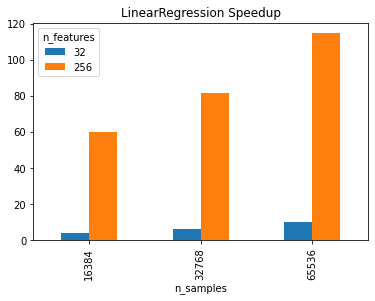

In [35]:
chart_single_algo_speedup(df, "LinearRegression")

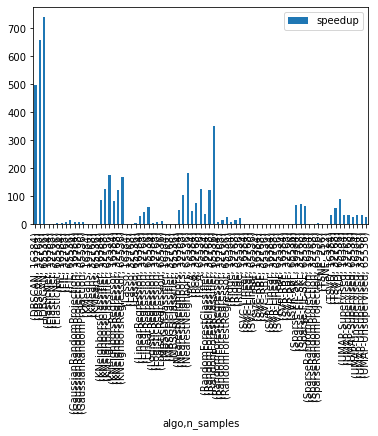

In [36]:
chart_all_algo_speedup(df)

### Output Results to CSV<a id="output_csv"/>

In [37]:
df.to_csv("benchmark_results.csv")